## Requirement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df = pd.read_csv(r'/Users/xiao/Projects/SpaceshipTitanic/data/train.csv')
df.shape

(8693, 14)

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [6]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


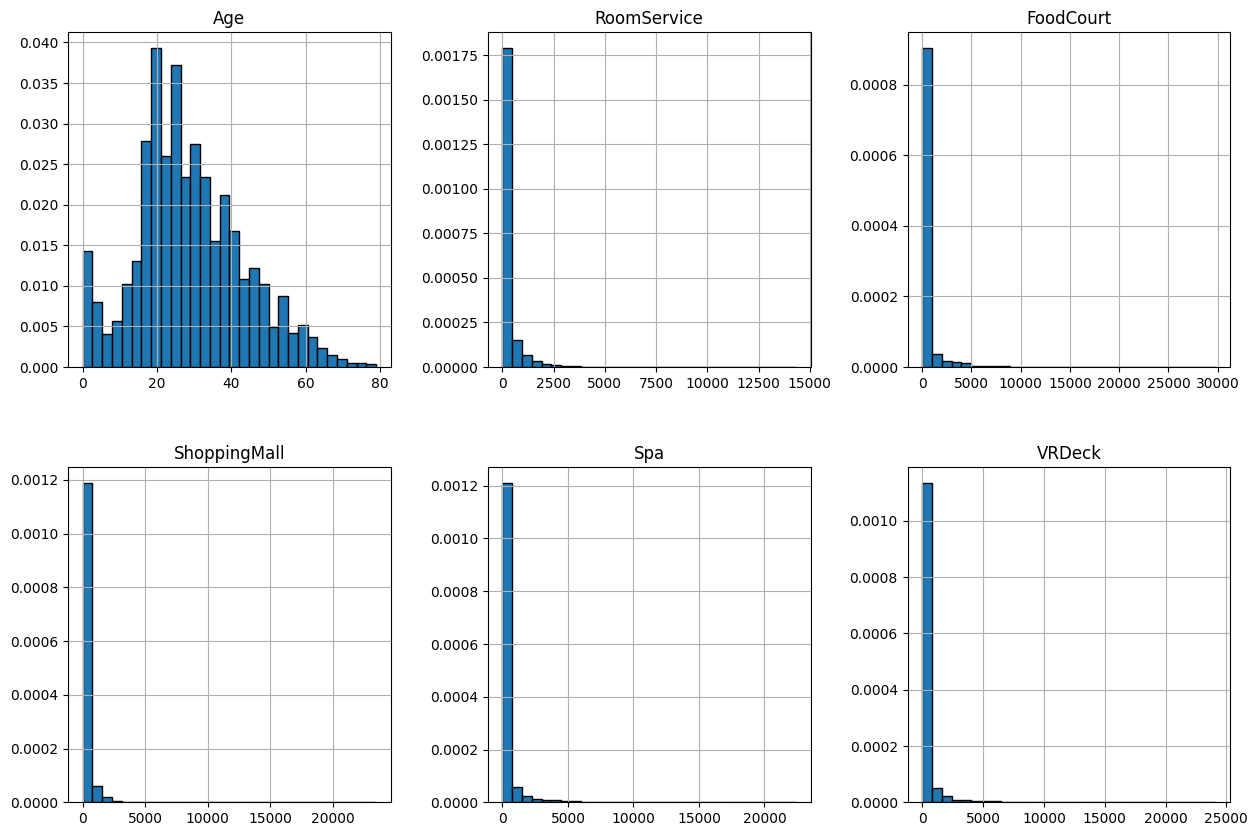

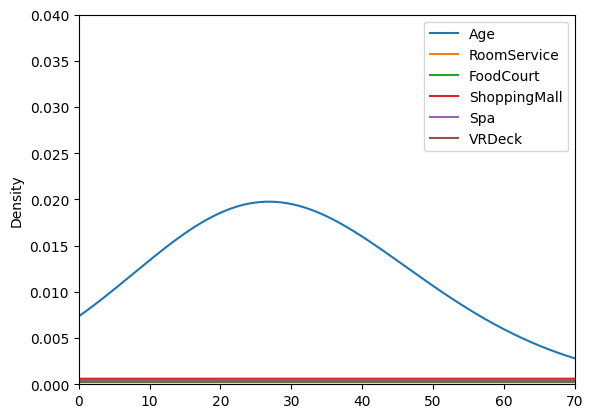

In [70]:
df.hist(bins=30, figsize=(15, 10), layout=(-1, 3), density=True, edgecolor='black')
df.plot(kind='kde', xlim=(0, 70), ylim=(0, 0.04), bw_method=1)
plt.show()

<AxesSubplot:>

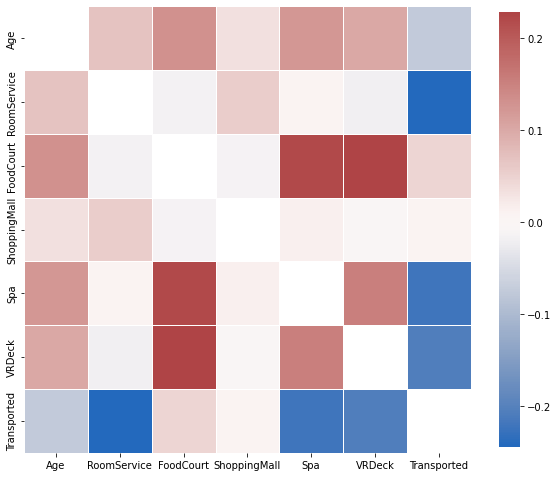

In [8]:
df_corr = df.corr(method='pearson') 
labels = np.where(np.abs(df_corr)>0.75, 'S', np.where(np.abs(df_corr)>0.5, 'M', np.where(np.abs(df_corr)> 0.25, 'W', "")))

# plot correlation matrix
plt.figure(figsize=(10, 10))
sn.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True, center=0, annot=labels, fmt='', linewidths=.5, cmap='vlag', cbar_kws={'shrink': 0.8})

### Analysis on each feature

In [7]:
pd.set_option('display.max_columns', 500)

In [49]:
ana_df = df.copy()

# Split features
ana_df[['group_id', 'number_id']] = ana_df['PassengerId'].str.split('_', expand=True)
ana_df[['first_name', 'last_name']] = ana_df['Name'].str.split(' ', expand=True)
ana_df[['cabin_deck', 'cabin_num', 'cabin_side']] = ana_df['Cabin'].str.split('/', expand=True)

# One-Hot Encode feature: HomePlanet and Destination
ana_df = pd.get_dummies(ana_df, columns=['HomePlanet', 'Destination', 'cabin_deck', 'cabin_side'])

# Ordinal Encode the last name within the same group_id
def encode_name(data):
    all_names = list(data['last_name'].unique())
    return data['last_name'].apply(lambda x: all_names.index(x))

ana_df['last_name_id'] = ana_df.groupby('group_id').apply(encode_name).values

# Remove redundent columns
ana_df = ana_df.drop(['Cabin', 'Name', 'first_name', 'last_name'], axis=1)

# Convert type of features
ana_df[['CryoSleep', 'VIP', 'Transported', 'group_id', 'number_id', 'cabin_num']] = ana_df[['CryoSleep', 'VIP', 'Transported', 'group_id', 'number_id', 'cabin_num']].astype('float')

# Binning Age

ana_df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group_id,number_id,cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_deck_A,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_side_P,cabin_side_S,last_name_id
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [72]:
pd.cut(ana_df.Age, [0, 10, 20, 30, 40, 50, 60, 70, 80])

0       (30, 40]
1       (20, 30]
2       (50, 60]
3       (30, 40]
4       (10, 20]
          ...   
8688    (40, 50]
8689    (10, 20]
8690    (20, 30]
8691    (30, 40]
8692    (40, 50]
Name: Age, Length: 8693, dtype: category
Categories (8, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

In [69]:
ana_df.plot(ana_df.Age)

KeyError: "None of [Float64Index([39.0, 24.0, 58.0, 33.0, 16.0, 44.0, 26.0, 28.0, 35.0, 14.0,\n              ...\n              21.0, 23.0,  0.0, 32.0, 30.0, 41.0, 18.0, 26.0, 32.0, 44.0],\n             dtype='float64', length=8693)] are in the [columns]"